In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from bs4 import BeautifulSoup
import requests
import re

In [3]:
url = ('https://www.atptour.com/en/rankings/singles?rankRange=1-5000&rankDate=2022-11-14')

In [4]:
r = requests.get(url)
r.status_code

200

In [5]:
soup = BeautifulSoup(r.content, 'html.parser')

In [6]:
df = []
rank = soup.find_all(class_='rank-cell border-left-4 border-right-dash-1')
rank1 = [i.string for i in rank]
rank1
player = soup.find_all('span', class_='player-cell-wrapper')
player1 = [i.text for i in player]
age = soup.find_all(class_='age-cell border-left-dash-1 border-right-4')
age1 = [i.text for i in age]
points = soup.find_all(class_='points-cell border-right-dash-1')
points1 = [i.text for i in points]
tournament = soup.find_all(class_='tourn-cell border-left-dash-1 border-right-dash-1')
tournament1 = [i.text for i in tournament]
df.append(rank1)
df = pd.DataFrame(df)
df = df.transpose()
df['Player'] = player1
df['Age'] = age1
df['Points'] = points1
df['Tournaments_Played'] = tournament1
df = df.rename(columns={0: 'Rank'})
df = df.replace(r'\n', ' ', regex=True)
df = df.replace(r'\r', ' ', regex=True)

In [7]:
url1 = ('https://www.tennisexplorer.com/ranking/atp-men/')
url2 = ('https://www.tennisexplorer.com/ranking/atp-men/?page=2')
url3 = ('https://www.tennisexplorer.com/ranking/atp-men/?page=3')
url4 = ('https://www.tennisexplorer.com/ranking/atp-men/?page=4')
url5 = ('https://www.tennisexplorer.com/ranking/atp-men/?page=5')

In [8]:
r1 = requests.get(url1)
r2 = requests.get(url2)
r3 = requests.get(url3)
r4 = requests.get(url4)
r5 = requests.get(url5)

In [9]:
soup1 = BeautifulSoup(r1.content, 'html.parser')
soup2 = BeautifulSoup(r2.content, 'html.parser')
soup3 = BeautifulSoup(r3.content, 'html.parser')
soup4 = BeautifulSoup(r4.content, 'html.parser')
soup5 = BeautifulSoup(r5.content, 'html.parser')

In [10]:
Country1 = soup1.find_all(class_='tl')
Country1 = [i.text for i in Country1]
Country1 = pd.DataFrame(Country1)
Country2 = soup2.find_all(class_='tl')
Country2 = [i.text for i in Country2]
Country2 = pd.DataFrame(Country2)
Country3 = soup3.find_all(class_='tl')
Country3 = [i.text for i in Country3]
Country3 = pd.DataFrame(Country3)
Country4 = soup4.find_all(class_='tl')
Country4 = [i.text for i in Country4]
Country4 = pd.DataFrame(Country4)
Country5 = soup5.find_all(class_='tl')
Country5 = [i.text for i in Country5]
Country5 = pd.DataFrame(Country5)
Country = pd.concat([Country1, Country2, Country3, Country4, Country5], ignore_index=True)
pd.set_option('display.max_rows', None)
Country
Country = Country.drop(np.r_[50:57, 107:114, 164:171, 221:228, 278:285])
Country
Country = Country.rename({0 : 'Country'}, axis=1)
Country.reset_index(drop=True, inplace=True)
table = pd.concat([df, Country], axis=1)
table = table.rename({0 : 'Country'}, axis=1)
table = table.head(250)

In [11]:
# EDA

In [12]:
#Adding New Columns

In [13]:
table['Grand_Slam_Winner'] = 'No'

In [14]:
table['Player'] = table['Player'].str.strip()

In [15]:
table.loc[table['Player'].isin(['Rafael Nadal', 'Novak Djokovic', 'Andy Murray', 'Stan Wawrinka', 'Marin Cilic', 'Dominic Thiem', 'Daniil Medvedev', 'Carlos Alcaraz']), 'Grand_Slam_Winner'] = 'Yes'

In [16]:
table['Grand_Slams'] = 0

In [17]:
table.loc[table['Player'] == 'Rafael Nadal', 'Grand_Slams'] = 22
table.loc[table['Player'] == 'Novak Djokovic', 'Grand_Slams'] = 21
table.loc[table['Player'] == 'Andy Murray', 'Grand_Slams'] = 3
table.loc[table['Player'] == 'Stan Wawrinka', 'Grand_Slams'] = 3
table.loc[table['Player'] == 'Marin Cilic', 'Grand_Slams'] = 1
table.loc[table['Player'] == 'Dominic Thiem', 'Grand_Slams'] = 1
table.loc[table['Player'] == 'Daniil Medvedev', 'Grand_Slams'] = 1
table.loc[table['Player'] == 'Carlos Alcaraz', 'Grand_Slams'] = 1

In [18]:
table.replace(',', '', regex=True, inplace=True)

In [19]:
table[['Rank', 'Age', 'Points', 'Tournaments_Played']] = table[['Rank','Age', 'Points', 'Tournaments_Played']].apply(pd.to_numeric)

Text(0.5, 0, 'Tournaments Played')

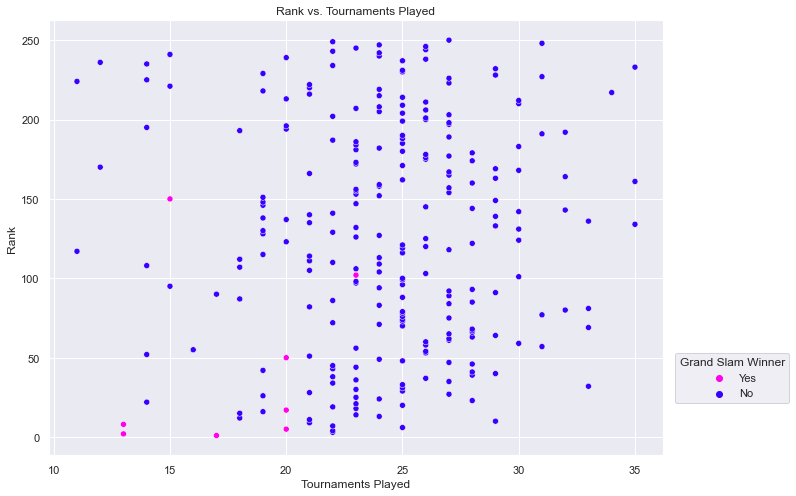

In [20]:
plt.figure(figsize=(11 ,8))
sns.set_style('darkgrid')
sns.set(palette='hsv_r')
plot = sns.scatterplot(x='Tournaments_Played', y='Rank', data=table, hue='Grand_Slam_Winner').set(title='Rank vs. Tournaments Played')
plt.legend(title='Grand Slam Winner', bbox_to_anchor=(1.02, 0.235), loc='upper left', borderaxespad=0)
plt.xlabel('Tournaments Played')

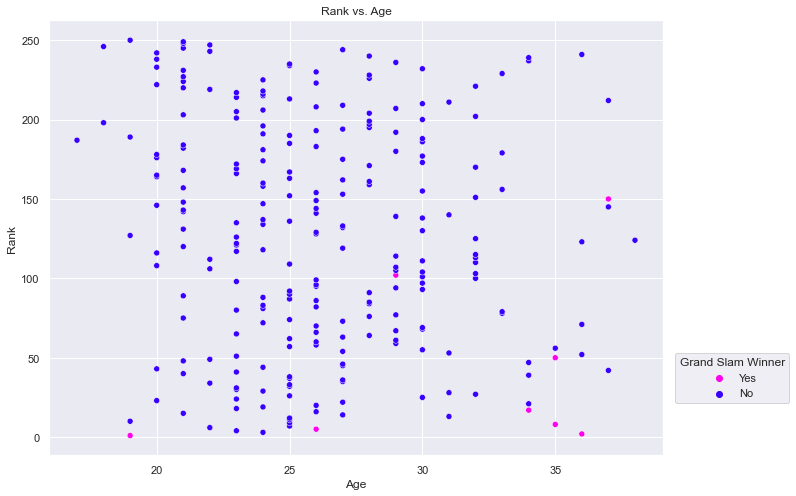

In [21]:
plt.figure(figsize=(11 ,8))
sns.set_style('darkgrid')
sns.set(palette='hsv_r')
plot = sns.scatterplot(x='Age', y='Rank', data=table, hue='Grand_Slam_Winner').set(title='Rank vs. Age')
plt.legend(title='Grand Slam Winner', bbox_to_anchor=(1.02, 0.235), loc='upper left', borderaxespad=0)

Text(0, 0.5, 'Country')

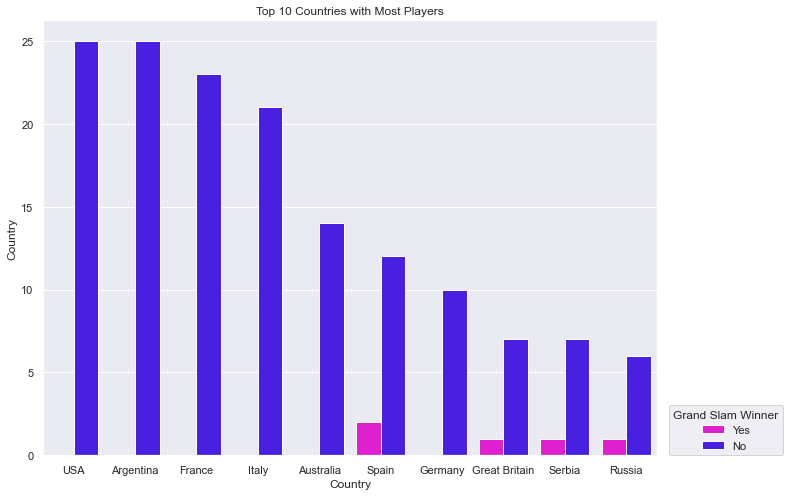

In [24]:
plt.figure(figsize=(11 ,8))
sns.countplot(data=table, x='Country', hue='Grand_Slam_Winner', order=table.Country.value_counts().iloc[:10].index).set(title='Top 10 Countries with Most Players')
plt.legend(title='Grand Slam Winner', bbox_to_anchor=(1.02, 0.115), loc='upper left', borderaxespad=0)
plt.ylabel('Country')

[Text(0.5, 1.0, 'Points vs. Country Boxplots for Top 10 Countries')]

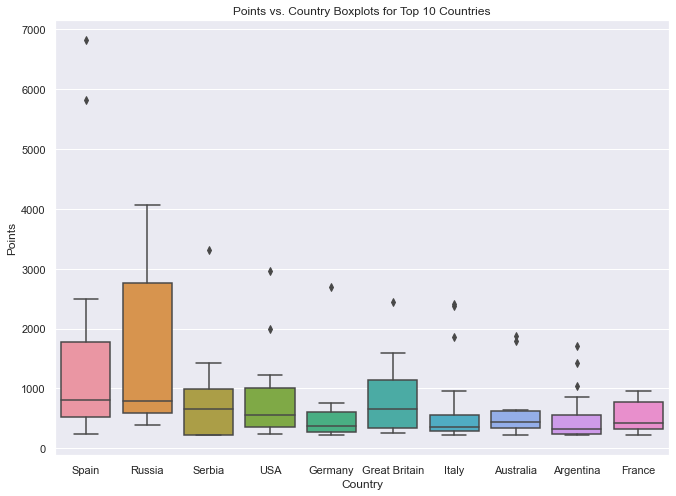

In [26]:
plt.figure(figsize=(11 ,8))
table['Country'] = table['Country'].str.strip()
country = table.query("Country in ('USA','Argentina', 'France', 'Italy', 'Australia', 'Spain', 'Germany', 'Great Britain', 'Serbia', 'Russia')")
sns.boxplot(x = 'Country', y = 'Points', data = country).set(title='Points vs. Country Boxplots for Top 10 Countries')

Text(0.5, 0, 'Grand Slam Winner')

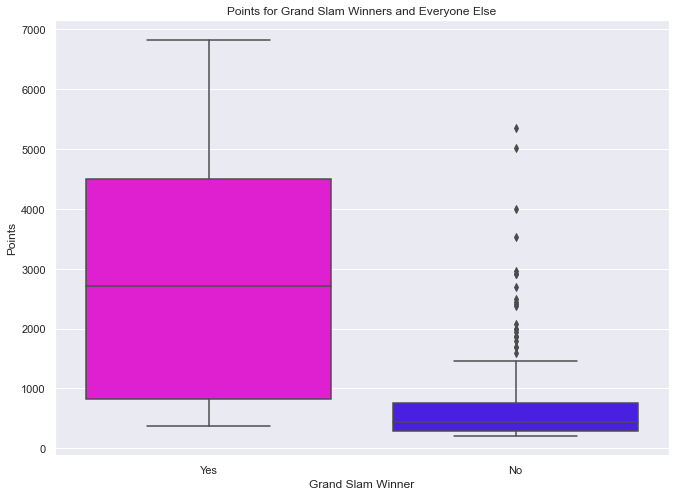

In [697]:
plt.figure(figsize=(11 ,8))
sns.boxplot(x = 'Grand_Slam_Winner', y = 'Points', data = table).set(title='Points for Grand Slam Winners and Everyone Else')
plt.xlabel('Grand Slam Winner')

[Text(0.5, 1.0, 'Histogram of Points')]

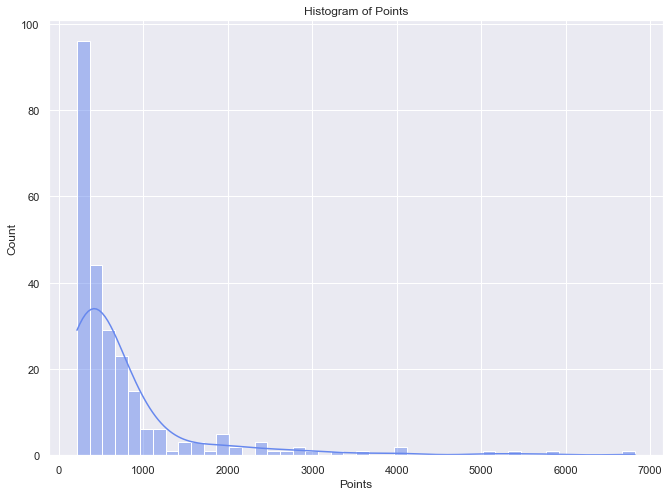

In [704]:
plt.figure(figsize=(11 ,8))
sns.histplot(x='Points', data=table, kde=True).set(title='Histogram of Points')

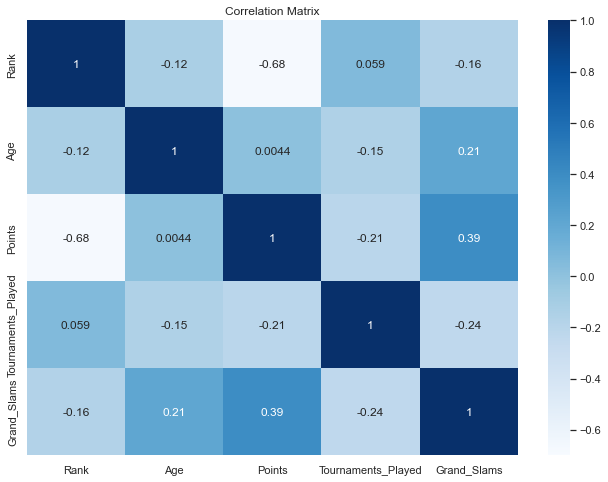

In [701]:
plt.figure(figsize=(11 ,8))
sns.set(palette='coolwarm')
heat_map = sns.heatmap(table.corr(), vmin=-0.7, vmax=1, annot=True, cmap='Blues').set(title='Correlation Matrix')